In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
!pip install xlrd

     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     ---------------------------------------- 96.5/96.5 kB 2.8 MB/s eta 0:00:00


In [12]:
dataset_path = 'C:\\Users\\lapde\\OneDrive - Solent University\\Desktop\\Datasets\\cement_strength_prediciton_polynomial_regression\\Concrete_Data.xls'

In [28]:
concrete_dataset = pd.read_excel(dataset_path)

In [29]:
concrete_dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [31]:
concrete_dataset.columns.to_list()

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

###### Cement (component 1): Amount of cement in kg per cubic meter mixture.
##### Blast Furnace Slag (component 2): Amount of blast furnace slag in kg per cubic meter mixture.
##### Fly Ash (component 3): Amount of fly ash in kg per cubic meter mixture.
###### Water (component 4): Amount of water in kg per cubic meter mixture.
###### Superplasticizer (component 5): Amount of superplasticizer in kg per cubic meter mixture.
###### Coarse Aggregate (component 6): Amount of coarse aggregate in kg per cubic meter mixture.
###### Fine Aggregate (component 7): Amount of fine aggregate in kg per cubic meter mixture.
 ###### Age (day): Age of the concrete in days.
###### Concrete compressive strength: Target variable, measured in MPa (megapascals).
## The goal of this project will be to predict the concrete compressive strength based on the other features, using polynomial regression.

In [32]:
print(f"The concrete dataset has a shape of {cement_dataset.shape}")

The concrete dataset has a shape of (1030, 9)


In [33]:
concrete_dataset.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

## There are no null values in the dataset

In [34]:
concrete_dataset.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


## EDA

##### Univariate analysis

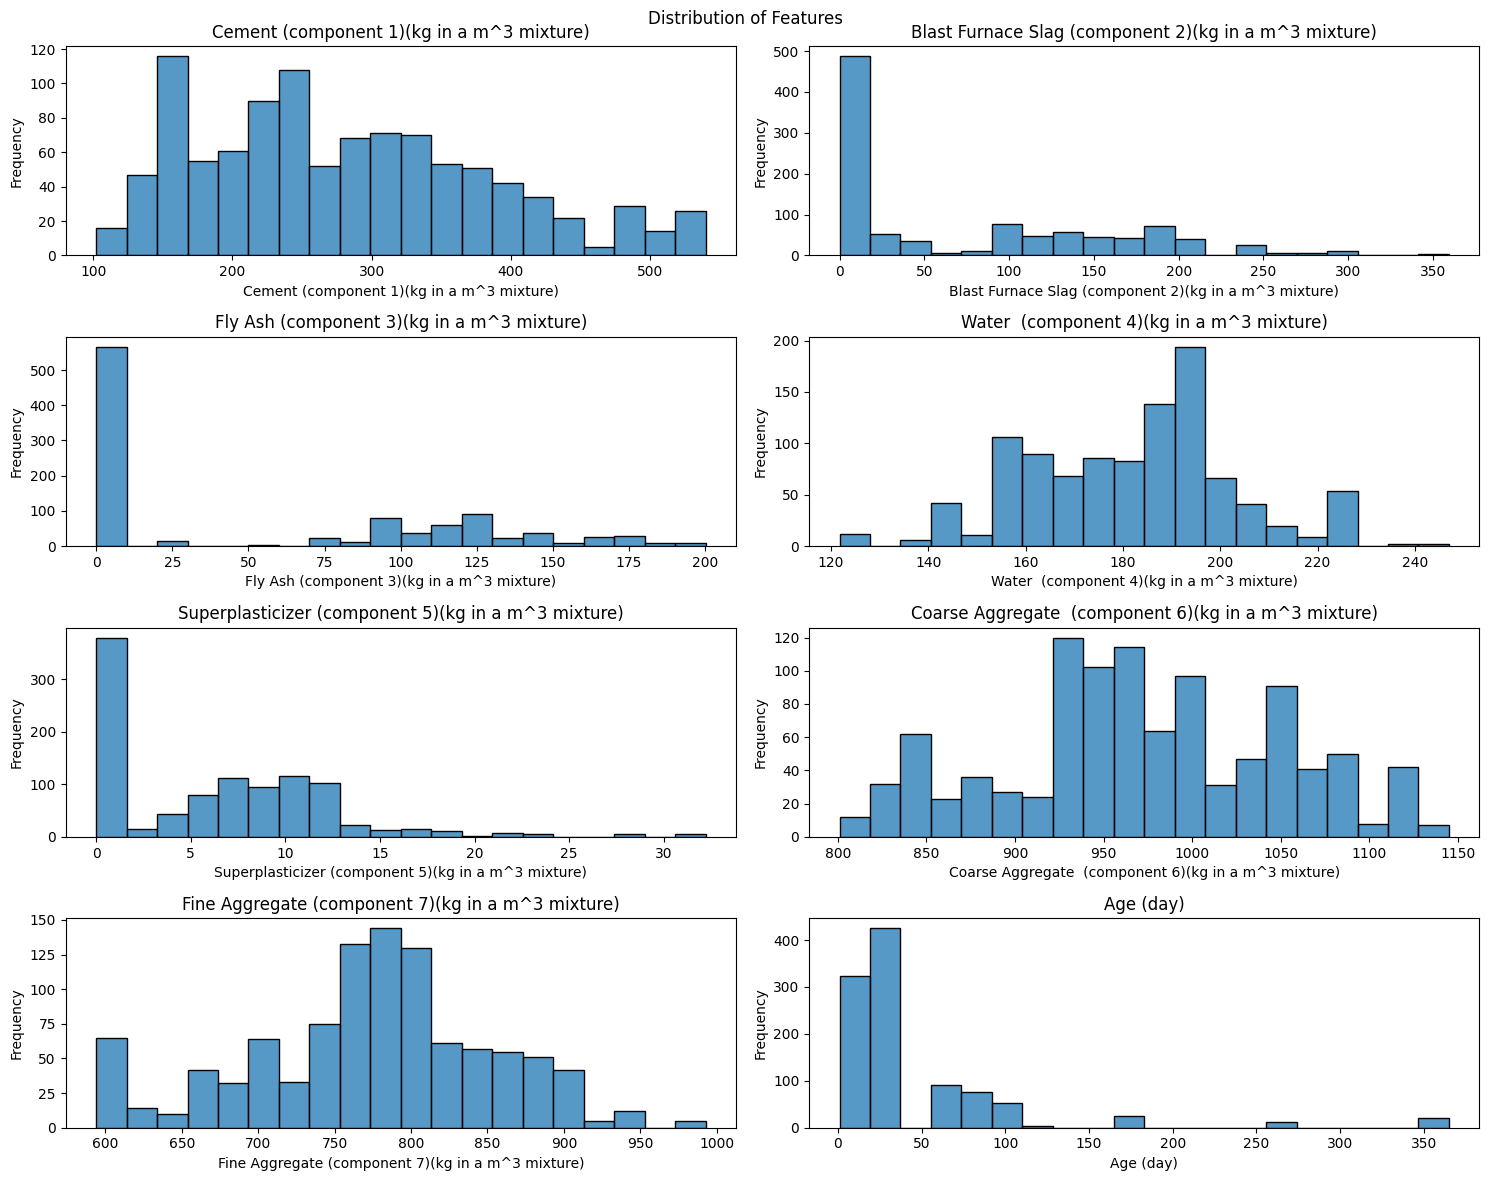

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of rows and columns for the grid
n_rows = 4
n_cols = 2

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
fig.suptitle('Distribution of Features')

# Flatten the axes to iterate through them
axes = axes.flatten()

# Loop through each feature and plot a histogram on the corresponding subplot
for i, column in enumerate(concrete_dataset.columns[:-1]):  # Exclude the target variable
    sns.histplot(concrete_dataset[column], kde=False, bins=20, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any extra subplots if there are more axes than features
for i in range(len(concrete_dataset.columns) - 1, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust title spacing
plt.show()


Cement (component 1): The distribution is slightly right-skewed, with most values between 100 and 400 kg/m³.

Blast Furnace Slag (component 2): A large number of observations have a value of 0, and the remaining values are spread across the range.

Fly Ash (component 3): Similar to the blast furnace slag, many observations have a value of 0, with the rest spread across the range.

Water (component 4): The distribution is more concentrated around 150 to 200 kg/m³, with some outliers.

Superplasticizer (component 5): Many observations have a value of 0, with the rest spread across the range, indicating different types of concrete mixes.

Coarse Aggregate (component 6): The distribution is fairly uniform, with values mostly between 800 and 1000 kg/m³.


Fine Aggregate (component 7): The distribution is slightly left-skewed, with most values between 600 and 800 kg/m³.

Age (day): Most of the concrete samples are relatively young, with many at 28 days. There are some older samples, but they are less common.

In [45]:
# histogram plot for target variable

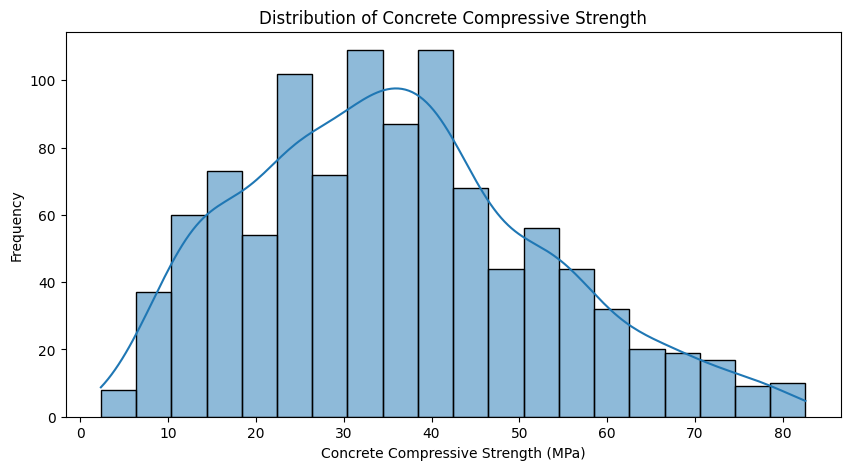

In [46]:
# Correcting the column name for the target variable
target_column = 'Concrete compressive strength(MPa, megapascals) '

# Plotting the distribution of the target variable "Concrete compressive strength"
plt.figure(figsize=(10, 5))
sns.histplot(concrete_dataset[target_column], kde=True, bins=20)
plt.title('Distribution of Concrete Compressive Strength')
plt.xlabel('Concrete Compressive Strength (MPa)')
plt.ylabel('Frequency')
plt.show()


## Bivariate analysis

In [ ]:
fig, axes = plt.subplots(4,2, figsize=(15,8))
fig.subtitle("Scatter plots for continous variables V/S Concrete Compressive Strength")

axes = axes.flatten()

# Loop through each feature and plot a histogram on the corresponding subplot
for i, column in enumerate(concrete_dataset.columns[:-1]):  # Exclude the target variable
    sns.histplot(concrete_dataset[column], kde=False, bins=20, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any extra subplots if there are more axes than features
for i in range(len(concrete_dataset.columns) - 1, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust title spacing
plt.show()

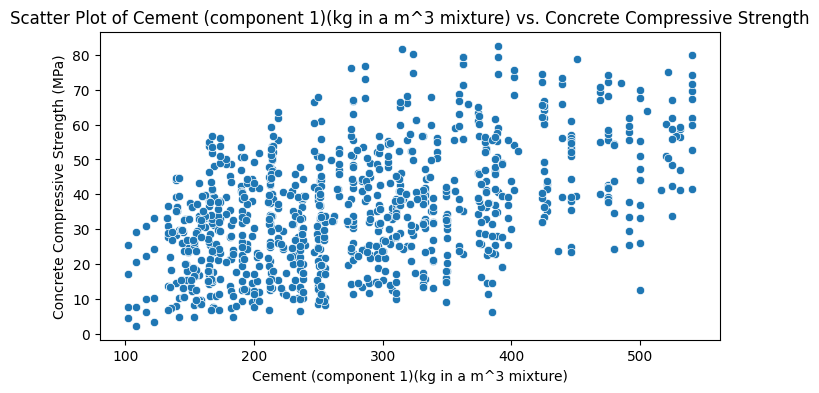

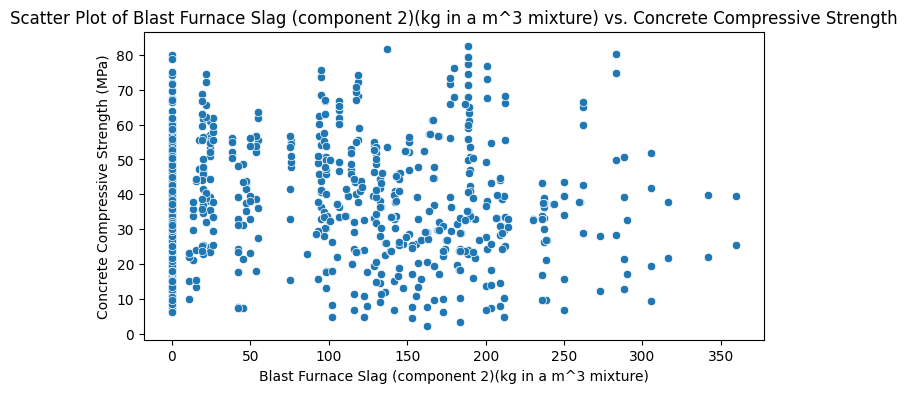

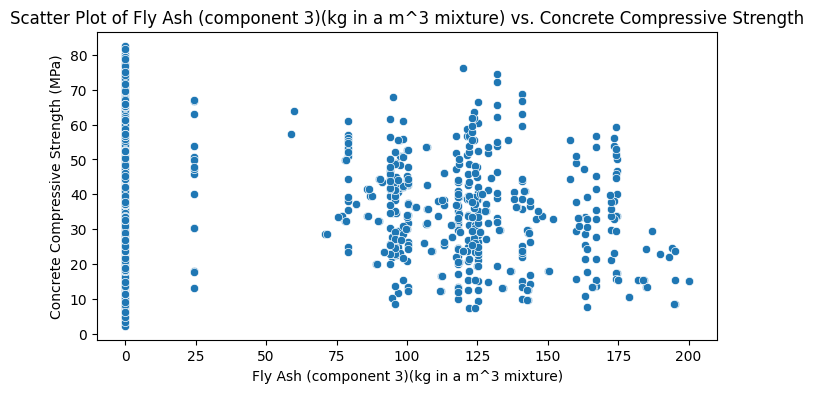

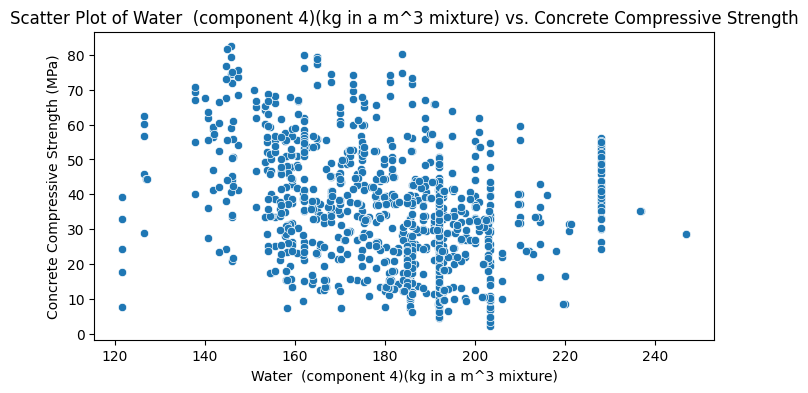

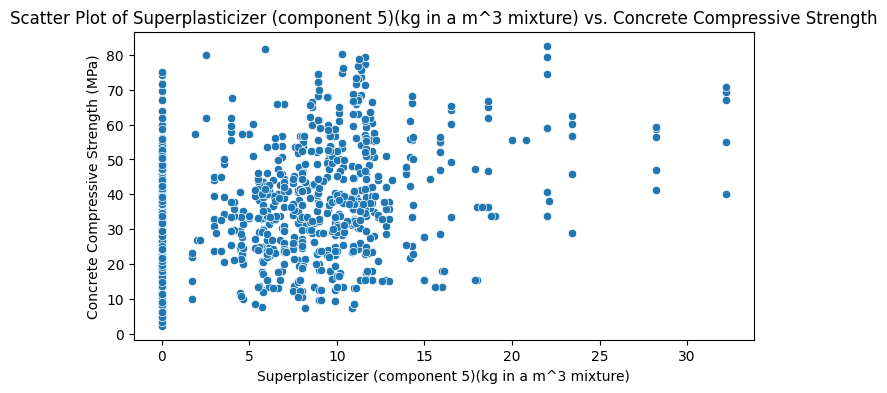

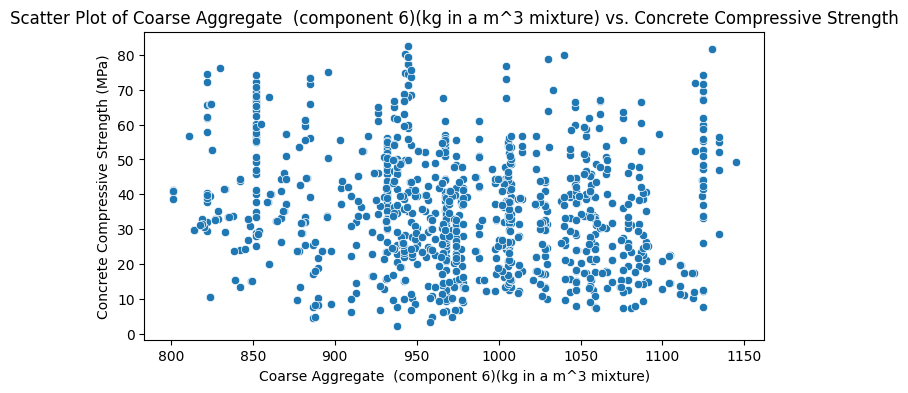

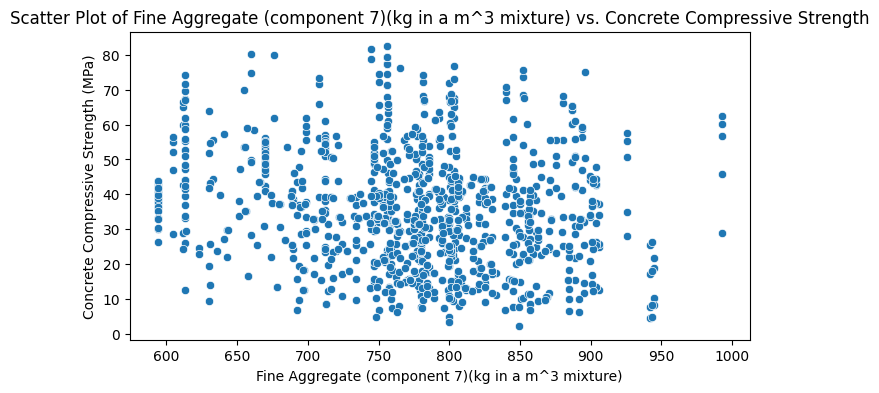

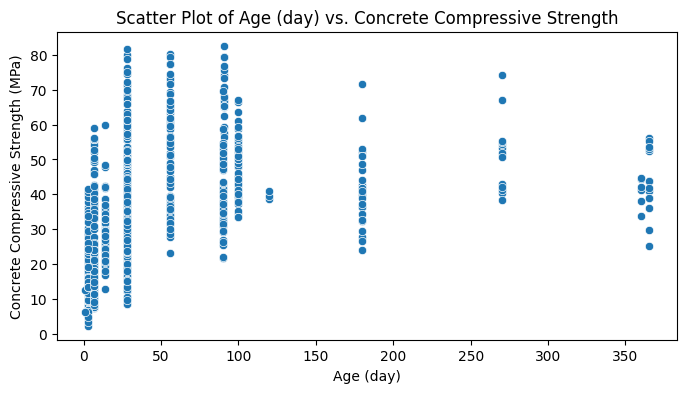

In [50]:

# Correcting the column name for the target variable
target_column = 'Concrete compressive strength(MPa, megapascals) '

# Loop through each feature and plot a scatter plot with the target variable
for column in concrete_dataset.columns[:-1]:  # Exclude the target variable
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=concrete_dataset[column], y=concrete_dataset[target_column])
    plt.title(f'Scatter Plot of {column} vs. Concrete Compressive Strength')
    plt.xlabel(column)
    plt.ylabel('Concrete Compressive Strength (MPa)')
    plt.show()


Cement (component 1): There seems to be a positive correlation with compressive strength.

Blast Furnace Slag (component 2): The relationship appears to be more complex, with different patterns depending on the amount of slag.

Fly Ash (component 3): Similar to slag, the relationship is more complex and depends on the amount of fly ash.

Water (component 4): There seems to be a negative correlation with compressive strength.

Superplasticizer (component 5): The relationship is not very clear, with different patterns depending on the amount of superplasticizer.

Coarse Aggregate (component 6): No clear relationship is observed.

Fine Aggregate (component 7): No clear relationship is observed.

Age (day): A positive correlation is observed, especially for samples with an age of 28 days.

In [52]:
#boxplot

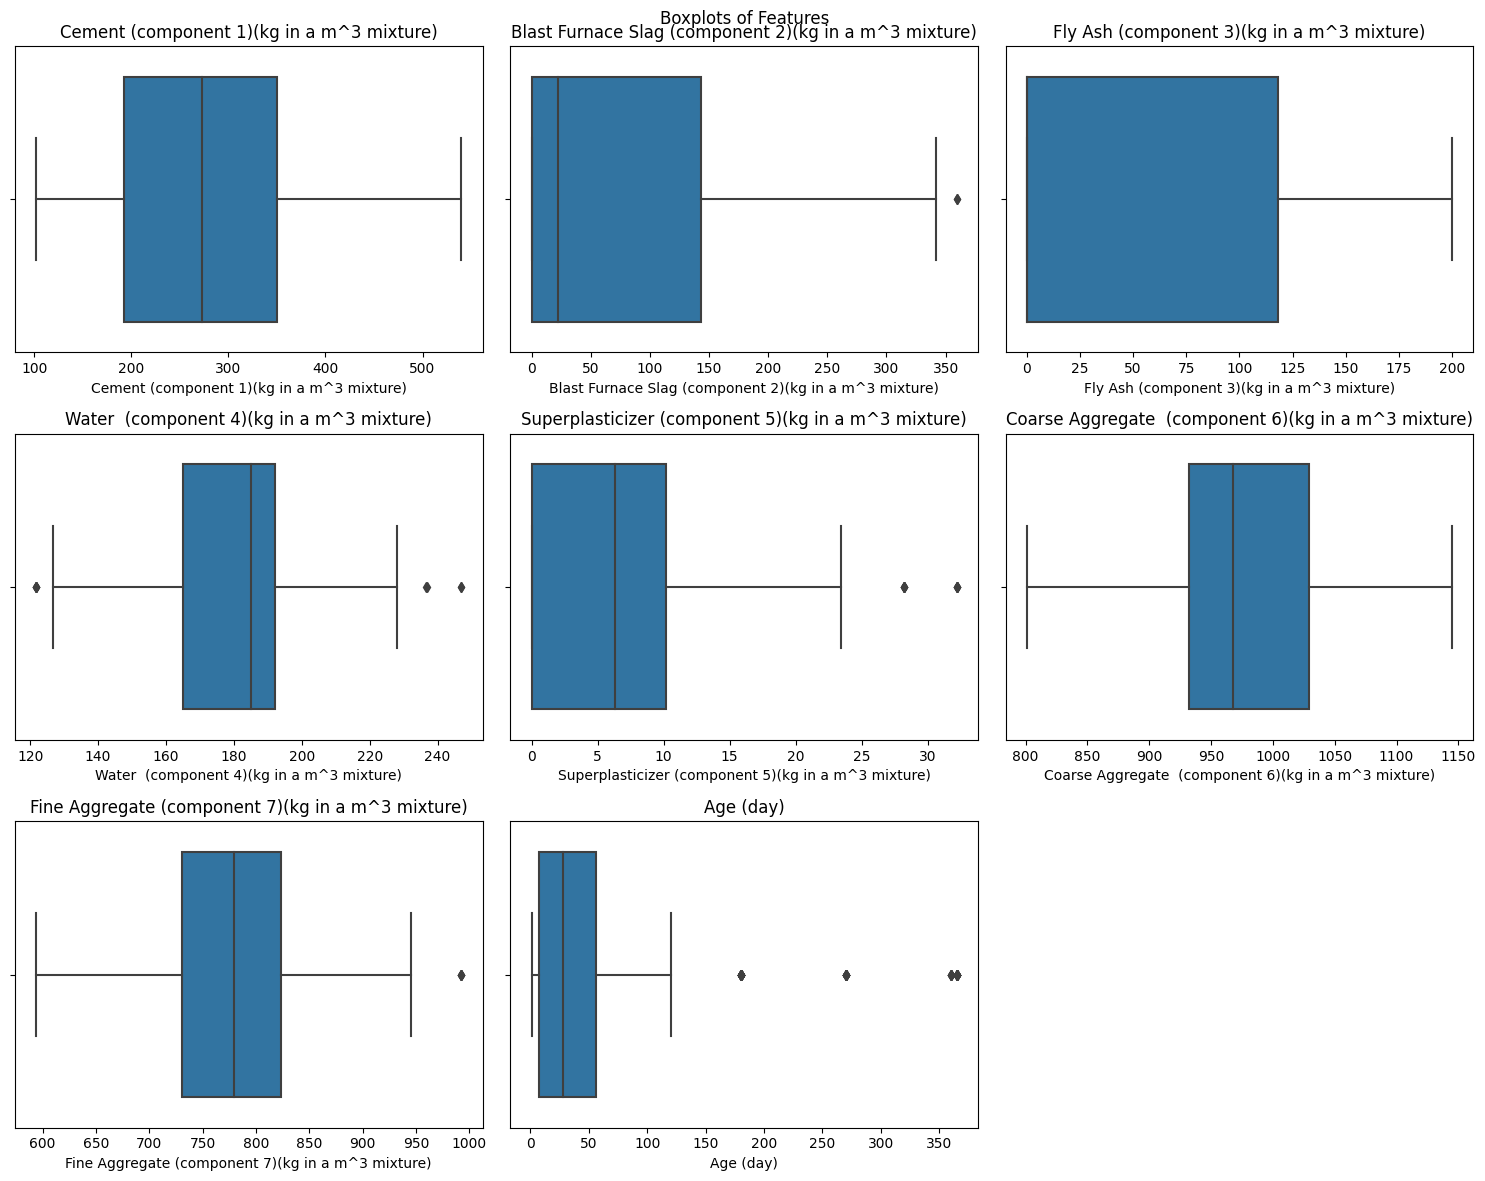

In [55]:
# Number of rows and columns for the grid
n_rows = 3
n_cols = 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
fig.suptitle('Boxplots of Features')

# Flatten the axes to iterate through them
axes = axes.flatten()

# Loop through each feature and plot a boxplot on the corresponding subplot
for i, column in enumerate(concrete_dataset.columns[:-1]):  # Exclude the target variable
    sns.boxplot(x=concrete_dataset[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel(column)

# Remove any extra subplots if there are more axes than features
for i in range(len(concrete_dataset.columns) - 1, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust title spacing
plt.show()


Cement (component 1): No significant outliers.

Blast Furnace Slag (component 2): No significant outliers.

Fly Ash (component 3): No significant outliers.

Water (component 4): Some outliers present on both ends.

Superplasticizer (component 5): Some outliers present on the lower end.

Coarse Aggregate (component 6): No significant outliers.

Fine Aggregate (component 7): Some outliers present on both ends.

Age (day): Many outliers present on the higher end, indicating samples with higher ages.

## Multivariate analysis

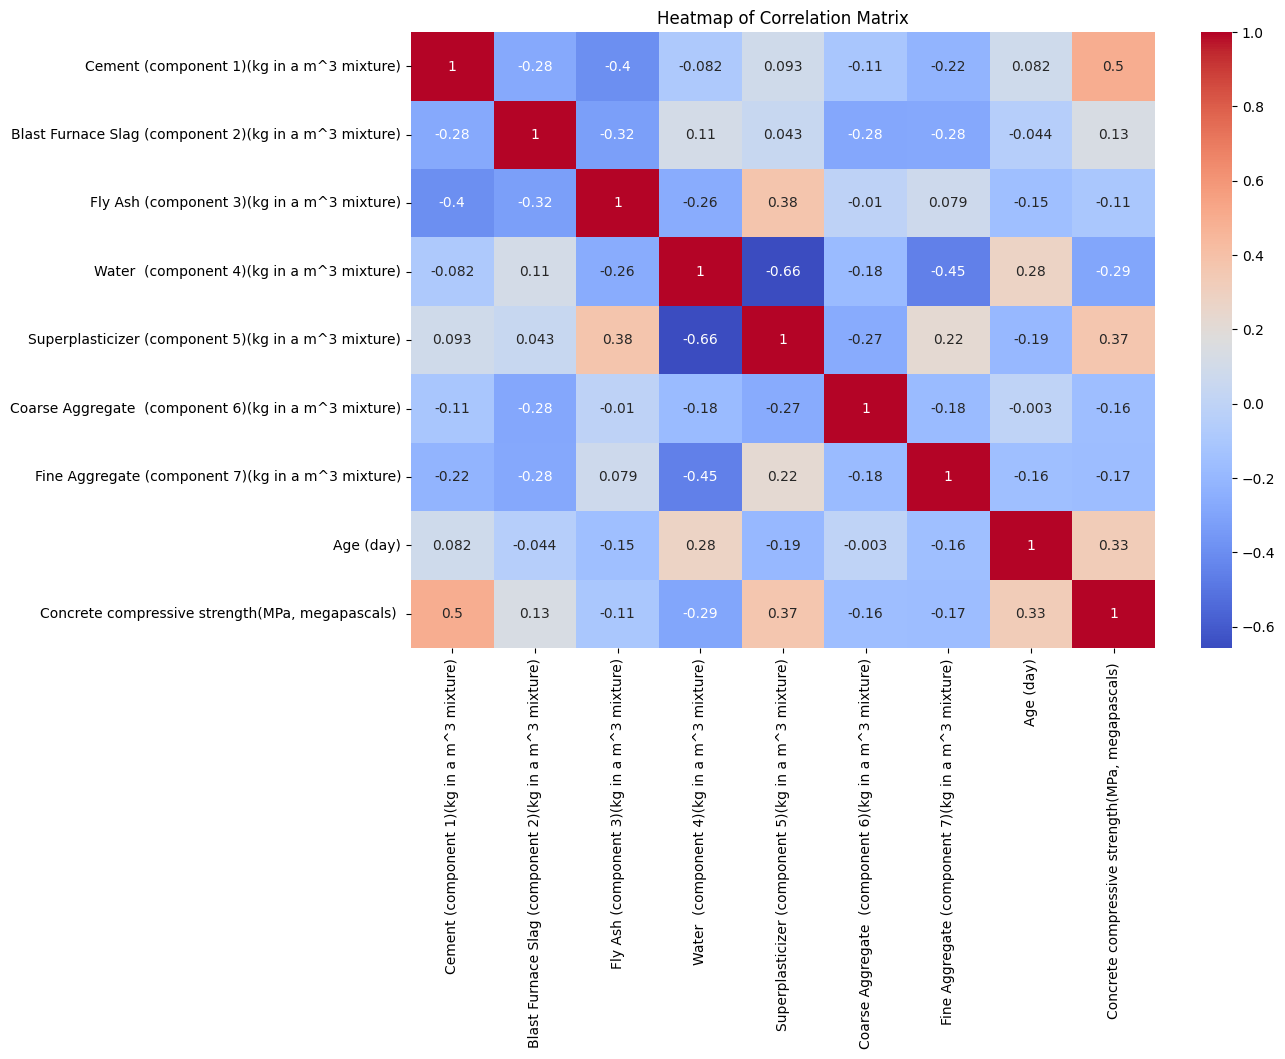

In [60]:
correlation_matrix = cement_dataset.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title("Heatmap of Correlation Matrix")
plt.show()

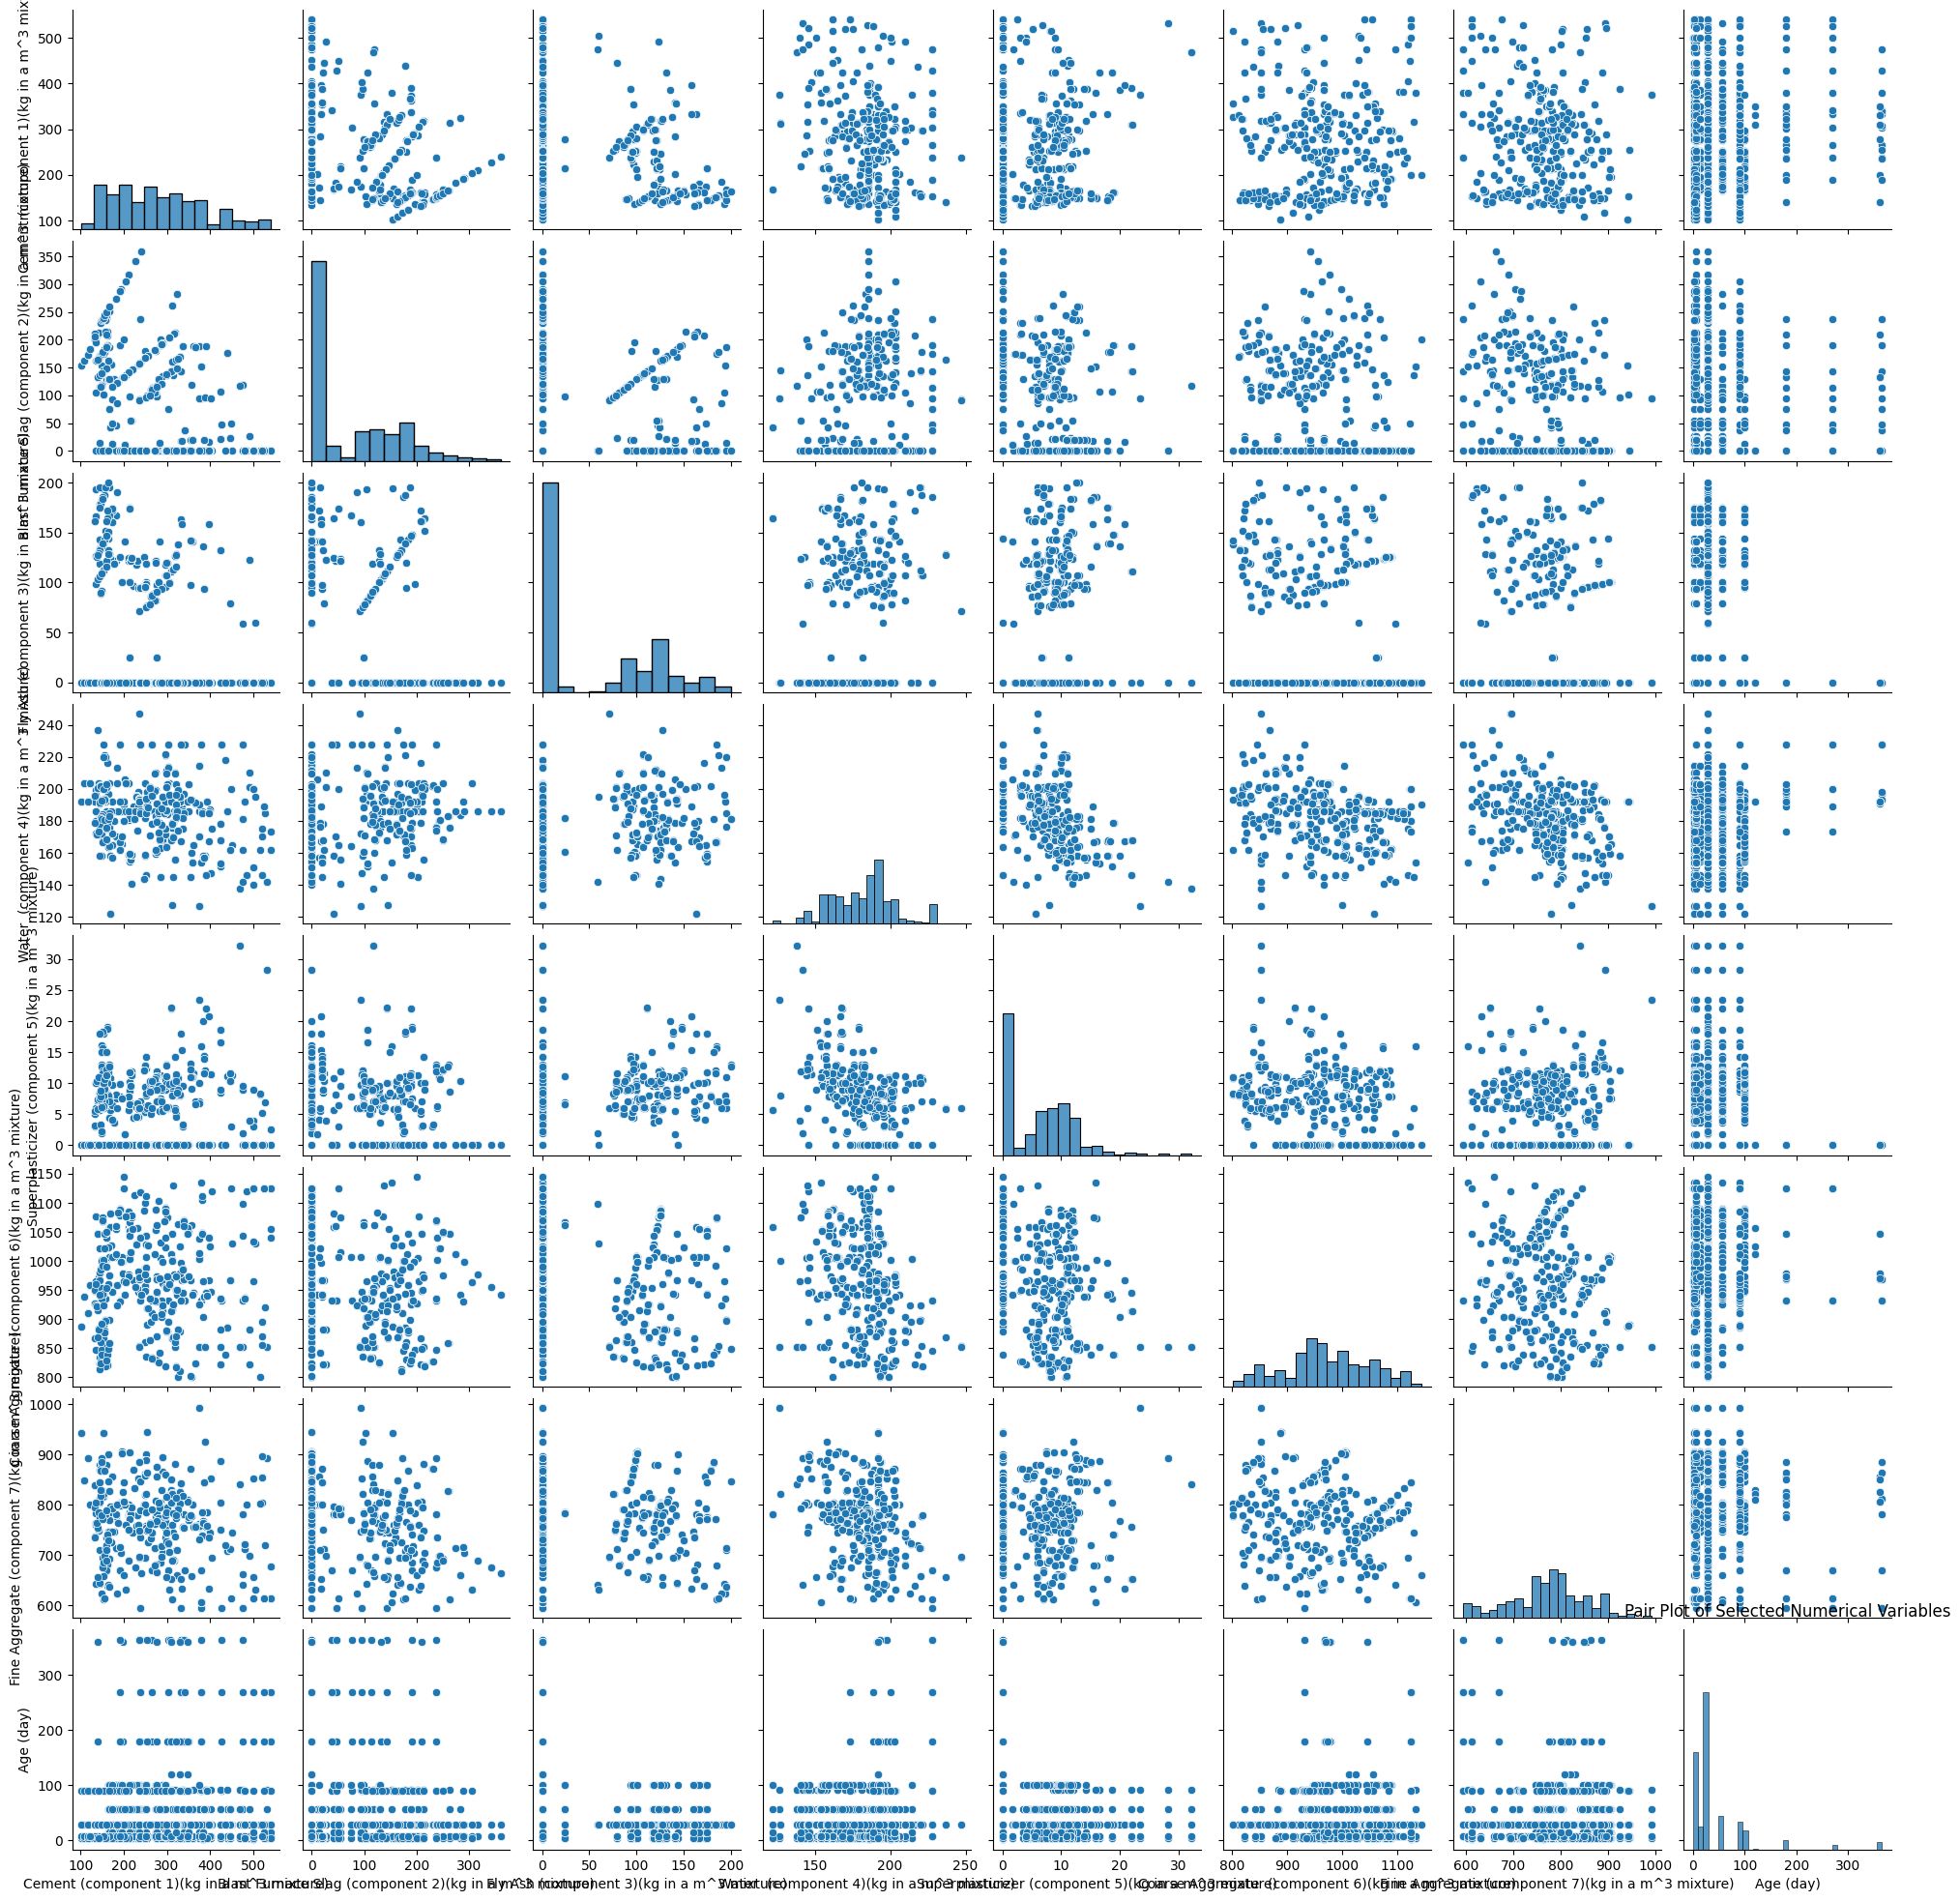

In [62]:
columns = cement_dataset.columns[:-1]
sns.pairplot(cement_dataset[columns])
plt.title("Pair Plot of Selected Numerical Variables", y=1.02)
plt.show()

## Scaling 

In [65]:
from sklearn.preprocessing import StandardScaler

In [ ]:
target_column = 'Concrete compressive strength(MPa, megapascals) '

In [66]:
# Separating the target variable and features

X = cement_dataset.drop(columns=[target_column])
y = cement_dataset[target_column]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Converting the scaled features back to a DataFrame for better visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Displaying the first few rows of the scaled features
X_scaled_df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487


The mean of each feature is now 0.

The standard deviation of each feature is now 1.

This transformation ensures that all the features are on the same scale, which can be particularly important when creating polynomial features for polynomial regression.

## Data Splitting

In [68]:
from sklearn.model_selection import train_test_split

In [78]:
#splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [79]:
# Checking the shape of the training and testing sets
(X_train.shape, X_test.shape), (y_train.shape, y_test.shape)

(((824, 8), (206, 8)), ((824,), (206,)))

## Modelling

In [80]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [81]:
# Step 1: Create Polynomial Features (degree 2)
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

# Step 2: Create Linear Regression Model
linear_model = LinearRegression()

# Step 3: Combine Steps into a Pipeline
polynomial_regression_pipeline = Pipeline([
    ("polynomial_features", polynomial_features),
    ("linear_model", linear_model)
])

# Training the Polynomial Regression Model on the Training Data
polynomial_regression_pipeline.fit(X_train, y_train)

# Displaying a success message
"Polynomial Regression Model trained successfully!"


'Polynomial Regression Model trained successfully!'

##### The degree of a polynomial is the highest power of the variable in the polynomial equation. In polynomial regression, the degree determines the highest power of the independent variable included in the model.



##### The Pipeline class from scikit-learn is used to combine the above two steps into a single model. The pipeline ensures that the transformations and modeling are applied consistently, both during training and when making predictions.

## Making predictions

In [82]:
# Making predictions on the testing data
y_pred = polynomial_regression_pipeline.predict(X_test)

# Displaying the first few predictions
y_pred[:5]

array([38.32969507, 49.51308903, 63.18616195, 47.95197497, 16.11571166])

In [83]:
# Evaluating the model using common regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(5.969643801944381, 55.58992637475108, 0.78426850497265)

### The model has 78% accuracy

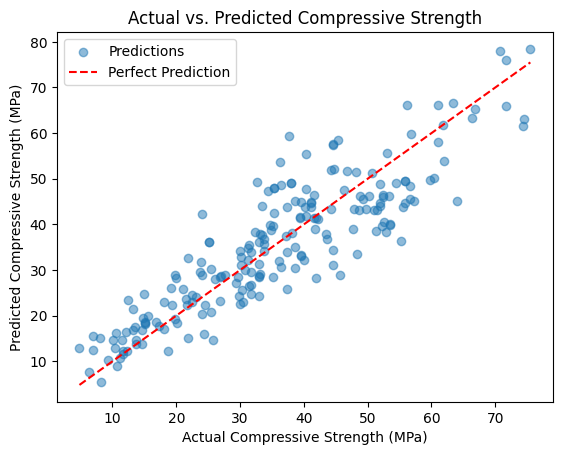

In [84]:
import matplotlib.pyplot as plt

# Scatter plot of the actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

# Adding labels and title
plt.xlabel('Actual Compressive Strength (MPa)')
plt.ylabel('Predicted Compressive Strength (MPa)')
plt.title('Actual vs. Predicted Compressive Strength')
plt.legend()

# Displaying the plot
plt.show()
